In [15]:
import tensorflow as tf
from tensorflow import keras 
import nltk
import pandas as pd
import numpy as np
import re
import codecs

dataset=pd.read_csv(r"C:\Users\A310349\Desktop\socialmedia-disaster-tweets-DFE.csv", sep=',', encoding='latin-1')
dataset


_unit_id  _golden _unit_state  _trusted_judgments _last_judgment_at  \
0      778243823     True      golden                 156               NaN   
1      778243824     True      golden                 152               NaN   
2      778243825     True      golden                 137               NaN   
3      778243826     True      golden                 136               NaN   
4      778243827     True      golden                 138               NaN   
5      778243828     True      golden                 140               NaN   
6      778243831     True      golden                 142               NaN   
7      778243832     True      golden                 151               NaN   
8      778243833     True      golden                 143               NaN   
9      778243834     True      golden                 136               NaN   
10     778243835     True      golden                 152               NaN   
11     778243836     True      golden                 157               NaN   
12     778243837     True      golden                 143               NaN   
13     778243838     True      golden                 140               NaN   
14     778243839     True      golden                 136               NaN   
15     778243840     True      golden                 147               NaN   
16     778243841     True      golden                 147               NaN   
17     778243842     True      golden                 132               NaN   
18     778243843     True      golden                 144               NaN   
19     778243844     True      golden                 147               NaN   
20     778243845     True      golden                 136               NaN   
21     778243846     True      golden                 151               NaN   
22     778243847     True      golden                 124               NaN   
23     778243848     True      golden                 140               NaN   
24     778243849     True      golden                 141               NaN   
25     778243851     True      golden                 142               NaN   
26     778243852     True      golden                 138               NaN   
27     778243853     True      golden                 137               NaN   
28     778243855     True      golden                 143               NaN   
29     778243856     True      golden                 138               NaN   
...          ...      ...         ...                 ...               ...   
10846  778261080     True      golden                  96               NaN   
10847  778261081     True      golden                  95               NaN   
10848  778261082    False      golden                  14     8/27/15 16:20   
10849  778261083     True      golden                  94               NaN   
10850  778261084     True      golden                 104               NaN   
10851  778261085     True      golden                  99               NaN   
10852  778261086     True      golden                 102               NaN   
10853  778261087     True      golden                  93               NaN   
10854  778261088     True      golden                  95               NaN   
10855  778261089     True      golden                  91               NaN   
10856  778261090     True      golden                 101               NaN   
10857  778261091     True      golden                  93               NaN   
10858  778261092     True      golden                  88               NaN   
10859  778261093     True      golden                 106               NaN   
10860  778261094     True      golden                  94               NaN   
10861  778261095    False      golden                   3     8/27/15 13:52   
10862  778261096     True      golden                  92               NaN   
10863  778261097     True      golden                  96               NaN   
10864  778261098     True      golden                 102 

In [33]:
questions=pd.read_csv(r"socialmedia_relevant_cols_clean.csv",sep=",",encoding="latin-1")
questions.tail()

text choose_one  \
10871  M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...   Relevant   
10872  Police investigating after an e-bike collided ...   Relevant   
10873  The Latest: More Homes Razed by Northern Calif...   Relevant   
10874  MEG issues Hazardous Weather Outlook (HWO) htt...   Relevant   
10875  #CityofCalgary has activated its Municipal Eme...   Relevant   

       class_label  
10871            1  
10872            1  
10873            1  
10874            1  
10875            1

In [34]:
questions.describe()

class_label
count  10876.000000
mean       1.567396
std        0.498420
min        0.000000
25%        1.000000
50%        2.000000
75%        2.000000
max        2.000000

In [41]:
def standardize_text(df, text_field):
    df[text_field] = df[text_field].str.replace(r"http\S+", "")
    df[text_field] = df[text_field].str.replace(r"http", "")
    df[text_field] = df[text_field].str.replace(r"@\S+", "")
    df[text_field] = df[text_field].str.replace(r"[^A-Za-z0-9(),!?@\'\`\"\_\n]", " ")
    df[text_field] = df[text_field].str.replace(r"@", "at")
    df[text_field] = df[text_field].str.lower()
    return df

questions = standardize_text(questions, "text")

questions.to_csv("clean_data.csv")
questions.head()



text choose_one  class_label
0                 just happened a terrible car crash   Relevant            1
1  our deeds are the reason of this  earthquake m...   Relevant            1
2  heard about  earthquake is different cities, s...   Relevant            1
3  there is a forest fire at spot pond, geese are...   Relevant            1
4             forest fire near la ronge sask  canada   Relevant            1

In [116]:
def standardizing(df,text_field):
    df[text_field]=df[text_field].str.replace(r"http\S+","")
    df[text_field]=df[text_field].str.replace(r"http","")
    df[text_field]=df[text_field].str.replace(r"@\S+","")
    df[text_field]=df[text_field].str.replace(r"@","at")
    df[text_field]=df[text_field].str.replace(r"[[^A-Za-z0-9(),!?@\'\`\"\_\n]]"," ")
    
    return df

             

In [42]:
clean_questions=pd.read_csv(r"C:\Users\A310349\Desktop\clean_data.csv",sep=",")
clean_questions.tail()

Unnamed: 0                                               text  \
10871       10871        m1 94  01 04 utc ?5km s of volcano hawaii     
10872       10872  police investigating after an e bike collided ...   
10873       10873  the latest  more homes razed by northern calif...   
10874       10874        meg issues hazardous weather outlook (hwo)    
10875       10875   cityofcalgary has activated its municipal eme...   

      choose_one  class_label  
10871   Relevant            1  
10872   Relevant            1  
10873   Relevant            1  
10874   Relevant            1  
10875   Relevant            1

In [47]:
clean_questions.groupby("class_label").count()

Unnamed: 0  text  choose_one
class_label                              
0                    16    16          16
1                  4673  4673        4673
2                  6187  6187        6187

In [56]:
# now the data is some what cleaned lets prepare for our model.
from nltk.tokenize import RegexpTokenizer

tokenizer= RegexpTokenizer(r'\w+')
clean_questions["tokens"]= clean_questions["text"].apply(tokenizer.tokenize)
clean_questions.head()


Unnamed: 0                                               text choose_one  \
0           0                 just happened a terrible car crash   Relevant   
1           1  our deeds are the reason of this  earthquake m...   Relevant   
2           2  heard about  earthquake is different cities, s...   Relevant   
3           3  there is a forest fire at spot pond, geese are...   Relevant   
4           4             forest fire near la ronge sask  canada   Relevant   

   class_label                                             tokens  
0            1          [just, happened, a, terrible, car, crash]  
1            1  [our, deeds, are, the, reason, of, this, earth...  
2            1  [heard, about, earthquake, is, different, citi...  
3            1  [there, is, a, forest, fire, at, spot, pond, g...  
4            1      [forest, fire, near, la, ronge, sask, canada]

154703 words total, with a vocabulary size of 18097


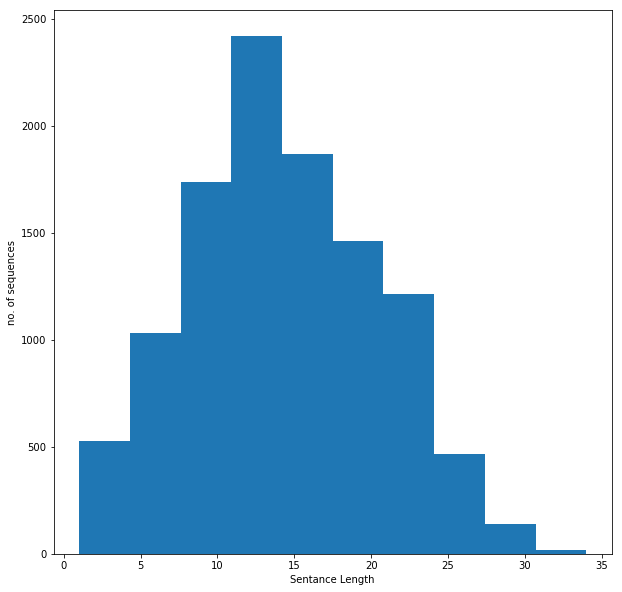

In [71]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

all_words= [word 
            for tokens in clean_questions["tokens"] 
            for word in tokens]

sentance_lengths=[len(tokens)
                  for tokens in clean_questions["tokens"]]

VOCAB=sorted(list(set(all_words)))
print("%s words total, with a vocabulary size of %s" % (len(all_words), len(VOCAB)))
import matplotlib.pyplot as plt
# %matplotlib inline
fig= plt.figure(figsize=(10,10))
plt.xlabel("Sentance Length")
plt.ylabel("no. of sequences")
plt.hist(sentance_lengths)
plt.show()


## Bag of Words Counts

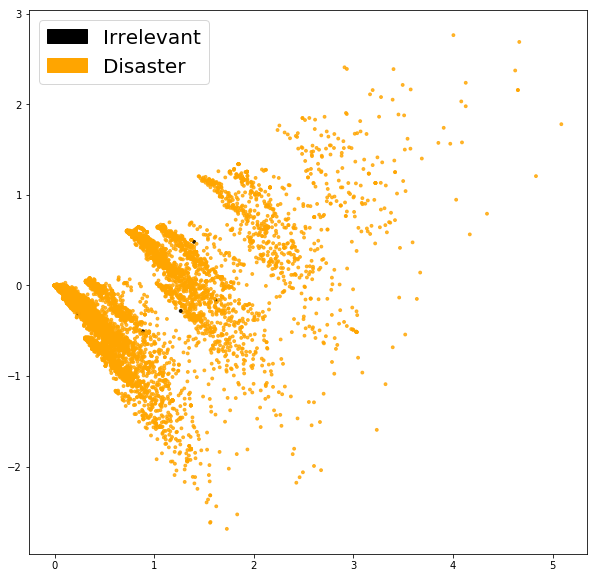

In [102]:
# now that data is cleaned and prepared we can do ML part.
# now for computer to understand the Natural Language we use embeddings(encode each character of text for interpreting)

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

def cv(data):
    count_vectorizer = CountVectorizer()

    emb = count_vectorizer.fit_transform(data)

    return emb, count_vectorizer

list_corpus = clean_questions["text"].tolist()
list_labels = clean_questions["class_label"].tolist()

X_train, X_test, y_train, y_test = train_test_split(list_corpus, list_labels, test_size=0.2, 
                                                                                random_state=40)

X_train_counts, count_vectorizer = cv(X_train)
X_test_counts = count_vectorizer.transform(X_test)



from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib
import matplotlib.patches as mpatches


def plot_LSA(test_data, test_labels, savepath="PCA_demo.csv", plot=True):
        lsa = TruncatedSVD(n_components=2)
        lsa.fit(test_data)
        lsa_scores = lsa.transform(test_data)
        color_mapper = {label:idx for idx,label in enumerate(set(test_labels))}
        color_column = [color_mapper[label] for label in test_labels]
        colors = ['Black','orange','orange']
        if plot:
            plt.scatter(lsa_scores[:,0], lsa_scores[:,1], s=8, alpha=.8, c=test_labels,
                        cmap=matplotlib.colors.ListedColormap(colors))
            red_patch = mpatches.Patch(color='Black', label='Irrelevant')
            green_patch = mpatches.Patch(color='orange', label='Disaster')
            plt.legend(handles=[red_patch, green_patch], prop={'size': 20})


fig = plt.figure(figsize=(10, 10))          
plot_LSA(X_train_counts, y_train)
plt.show()

In [104]:
from sklearn.linear_model import LogisticRegression
clf= LogisticRegression(C=30.0,class_weight="balanced",solver="newton-cg"
                       , multi_class="multinomial",n_jobs=-1,random_state=40)
clf.fit(X_train_counts,y_train)
y_predicted_counts=clf.predict(X_test_counts)

In [115]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report

def get_metrics(y_test, y_predicted):  
    # true positives / (true positives+false positives)
    precision = precision_score(y_test, y_predicted, pos_label=None,
                                    average='weighted')             
    # true positives / (true positives + false negatives)
    recall = recall_score(y_test, y_predicted, pos_label=None,
                              average='weighted')
    
    # harmonic mean of precision and recall
    f1 = f1_score(y_test, y_predicted, pos_label=None, average='weighted')
    
    # true positives + true negatives/ total
    accuracy = accuracy_score(y_test, y_predicted)
    return accuracy, precision, recall, f1

accuracy, precision, recall, f1 = get_metrics(y_test, y_predicted_counts)
print("accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy, precision, recall, f1))

accuracy = 0.754, precision = 0.752, recall = 0.754, f1 = 0.753
